In [1]:
import pandas as pd
import numpy as np
import os
from config import C_COMMON, C_SINGLE, C_GRID
from copy import deepcopy
import time
import matplotlib.pyplot as plt

# import models
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')

# base model

In [3]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in', 'season_wet', 'elevation']:
    columns.remove(r)

In [4]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [5]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=270,
        max_depth=None,
        min_samples_split=3,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 300, 'learning_rate': 0.09153907009972553, 'max_depth': 8, 'verbosity': 1}
    xgboost = XGBRegressor(
        n_estimators=300,
        learning_rate=0.09153907009972553,
        max_depth=8,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    # gradient_boost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_base = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        # mean_squared_error(Ytest, gradient_boost.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_base=}")

mse_base=[28.55376711301076, 17.667040286930792, 16.04367983601152]
mse_base=[28.55376711301076, 17.78841010866587, 15.909137434988939]
mse_base=[28.55376711301076, 17.742971362792133, 16.04210105160116]
mse_base=[28.55376711301076, 17.752080068991873, 16.084941752345042]
mse_base=[28.55376711301076, 17.795585277922434, 15.752474899679282]


# include season_wet

In [6]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in', 'elevation']:
    columns.remove(r)

In [7]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [8]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=250,
        max_depth=None,
        min_samples_split=2,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 240, 'learning_rate': 0.0552212149966506, 'max_depth': 9, 'verbosity': 1}    
    xgboost = XGBRegressor(
        n_estimators=240,
        learning_rate=0.0552212149966506,
        max_depth=9,
        verbosity=0,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(200)
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_season = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_season=}")

mse_season=[28.53627284656808, 17.484945692769276, 15.749628309418968]
mse_season=[28.53627284656808, 17.43960863485759, 15.69439252051422]
mse_season=[28.53627284656808, 17.622965806722664, 15.838838773812045]
mse_season=[28.53627284656808, 17.59142711559884, 15.460952562954663]
mse_season=[28.53627284656808, 17.609602604076315, 15.66307643940348]


# include elevation

In [9]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in', 'season_wet']:
    columns.remove(r)

In [10]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [11]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=5,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 170, 'learning_rate': 0.10612358557408665, 'max_depth': 8, 'verbosity': 1}
    xgboost = XGBRegressor(
        n_estimators=170,
        learning_rate=0.10612358557408665,
        max_depth=8,
        verbosity=0,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(200)
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_elevation = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_elevation=}")

mse_elevation=[28.357063071091094, 17.940712466940568, 15.765039668708933]
mse_elevation=[28.357063071091094, 18.014428667740294, 15.73153018085862]
mse_elevation=[28.357063071091094, 17.928919716828265, 15.7001051545086]
mse_elevation=[28.357063071091094, 18.010999337539126, 15.81091605088153]
mse_elevation=[28.357063071091094, 17.89326721006452, 15.748569729386464]


# include season and elevetion

In [12]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in']:
    columns.remove(r)

In [13]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [14]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=180,
        max_depth=None,
        min_samples_split=4,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 290, 'learning_rate': 0.11614551526207657, 'max_depth': 9, 'verbosity': 1}
    xgboost = XGBRegressor(
        n_estimators=290,
        learning_rate=0.11614551526207657,
        max_depth=9,
        verbosity=0,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(200)
    )
    
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_both = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_both=}")

mse_both=[28.361727224643428, 17.66472127416411, 15.759293408918102]
mse_both=[28.361727224643428, 17.65528778063932, 15.64080698453404]
mse_both=[28.361727224643428, 17.68980717851834, 15.80523234963171]
mse_both=[28.361727224643428, 17.699001366492617, 15.977134555164852]
mse_both=[28.361727224643428, 17.575198733803255, 16.128104956390153]


In [15]:
print('experiment complete')

experiment complete


# aggregate the result

In [28]:
mse_base = np.array([
    [28.55376711301076, 17.667040286930792, 16.04367983601152],
    [28.55376711301076, 17.78841010866587, 15.909137434988939],
    [28.55376711301076, 17.742971362792133, 16.04210105160116],
    [28.55376711301076, 17.752080068991873, 16.084941752345042],
    [28.55376711301076, 17.795585277922434, 15.752474899679282],
])
mse_season = np.array([
    [28.53627284656808, 17.484945692769276, 15.749628309418968],
    [28.53627284656808, 17.43960863485759, 15.69439252051422],
    [28.53627284656808, 17.622965806722664, 15.838838773812045],
    [28.53627284656808, 17.59142711559884, 15.460952562954663],
    [28.53627284656808, 17.609602604076315, 15.66307643940348],
])

mse_elevation = np.array([
    [28.357063071091094, 17.940712466940568, 15.765039668708933],
    [28.357063071091094, 18.014428667740294, 15.73153018085862],
    [28.357063071091094, 17.928919716828265, 15.7001051545086],
    [28.357063071091094, 18.010999337539126, 15.81091605088153],
    [28.357063071091094, 17.89326721006452, 15.748569729386464],
])
mse_both = np.array([  
    [28.361727224643428, 17.66472127416411, 15.759293408918102],
    [28.361727224643428, 17.65528778063932, 15.64080698453404],
    [28.361727224643428, 17.68980717851834, 15.80523234963171],
    [28.361727224643428, 17.699001366492617, 15.977134555164852],
    [28.361727224643428, 17.575198733803255, 16.128104956390153],
])

In [29]:
rmse_base = np.sqrt(mse_base).mean(axis=0)
rmse_season = np.sqrt(mse_season).mean(axis=0)
rmse_elevation = np.sqrt(mse_elevation).mean(axis=0)
rmse_both = np.sqrt(mse_both).mean(axis=0)

std_base = np.sqrt(mse_base).std(axis=0)
std_season = np.sqrt(mse_season).std(axis=0)
std_elevation = np.sqrt(mse_elevation).std(axis=0)
std_both = np.sqrt(mse_both).std(axis=0)

In [31]:
[rmse_base, rmse_season, rmse_elevation, rmse_both]

[array([5.3435725 , 4.2129785 , 3.99577677]),
 array([5.34193531, 4.1892282 , 3.95994023]),
 array([5.32513503, 4.23764486, 3.9687795 ]),
 array([5.32557295, 4.20199668, 3.98266903])]

In [32]:
[std_base, std_season, std_elevation, std_both]

[array([0.        , 0.00543799, 0.01532878]),
 array([0.        , 0.00877668, 0.01584637]),
 array([0.        , 0.00561572, 0.00463225]),
 array([0.        , 0.00521569, 0.0214904 ])]

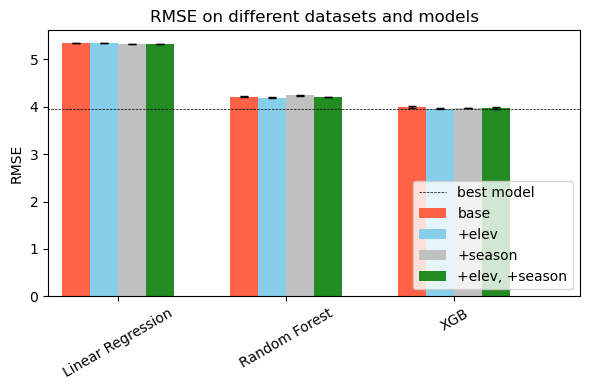

In [30]:
min_value = np.min([rmse_base, rmse_season, rmse_elevation, rmse_both])

n_bars=3
width = 1/(n_bars + 3)

fig, ax = plt.subplots(1, dpi=100)
colors = ['tomato', 'skyblue', 'silver', 'forestgreen']
for i, (mean, std) in enumerate(zip(
    [rmse_base, rmse_season, rmse_elevation, rmse_both],
    [std_base, std_season, std_elevation, std_both]
)):
    ax.bar(
        x=np.arange(3) + i * width,
        height=mean,
        width=width,
        color=colors[i],
        yerr=std,
        capsize=3,
    )
ax.set_xlim((-width,3))
ax.hlines(y=min_value, xmin=-1, xmax=4, linestyle="--", color="k", linewidth=0.5)

ax.set_xticks(np.arange(3) + width * 1.5)
ax.set_xticklabels(["Linear Regression", "Random Forest", "XGB"], rotation=30)
ax.legend(labels=["best model", "base", "+elev", "+season", "+elev, +season"], loc="lower right")
ax.set_ylabel("RMSE")
ax.set_title("RMSE on different datasets and models")
print()
plt.tight_layout()


# interpolation data

In [19]:
import pandas as pd
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_interp_50.csv')

In [20]:
# interp does not have season_wet, so include here
df['season_wet'] = df.apply(lambda row: 1 if row['month'] < 5 or row['month'] > 10 else 0, axis=1) # May - Oct is dry

In [21]:
df.columns

Index(['skn', 'year', 'month', 'data_in', 'name', 'lat', 'lon', 'elevation',
       'Observer', 'Status2010', 'NumMos', 'MinYear', 'MaxYear', 'air2m',
       'air1000_500', 'hgt500', 'hgt1000', 'omega500', 'pottemp1000-500',
       'pottemp1000-850', 'pr_wtr', 'shum-uwnd-700', 'shum-uwnd-925',
       'shum-vwnd-700', 'shum-vwnd-950', 'shum700', 'shum925', 'skt', 'slp',
       'season_wet'],
      dtype='object')

In [22]:
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in']:
    columns.remove(r)

In [23]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [24]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=270,
        max_depth=None,
        min_samples_split=3,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 190, 'learning_rate': 0.06343030588634535, 'max_depth': 9, 'verbosity': 1}
    xgboost = XGBRegressor(
        n_estimators=190,
        learning_rate=0.06343030588634535,
        max_depth=9,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_50 = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_50=}")

mse_50=[30.922437300955757, 18.455649037066063, 16.379463039645696]
mse_50=[30.922437300955757, 18.366385809741015, 16.52976406730775]
mse_50=[30.922437300955757, 18.36050211002748, 16.291368894201934]
mse_50=[30.922437300955757, 18.36674072993671, 16.382896494199944]
mse_50=[30.922437300955757, 18.403009346609572, 16.487075658928674]


In [25]:
# interp 100
import pandas as pd
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_interp_100.csv')
# interp does not have season_wet, so include here
df['season_wet'] = df.apply(lambda row: 1 if row['month'] < 5 or row['month'] > 10 else 0, axis=1) # May - Oct is dry

In [26]:
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in']:
    columns.remove(r)
    
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [27]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=270,
        max_depth=None,
        min_samples_split=3,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 240, 'learning_rate': 0.08517091695770271, 'max_depth': 8, 'verbosity': 1}
    xgboost = XGBRegressor(
        n_estimators=240,
        learning_rate=0.08517091695770271,
        max_depth=8,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_50 = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_50=}")

mse_50=[30.919258466162646, 18.352033891118595, 16.779192177196265]
mse_50=[30.919258466162646, 18.223001316497985, 16.416847336192166]
mse_50=[30.919258466162646, 18.33867413361444, 16.890602084562126]
mse_50=[30.919258466162646, 18.256311074202188, 16.43905567594778]
mse_50=[30.919258466162646, 18.346601616243348, 16.724302818203597]


In [ ]:
# HYPERPARAMETERS ARE DIFFERENT...NONE OF THEM BUT NOBODY CARES, RIGHT?

# 6grid

In [33]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

In [34]:
LABELS = [
    'air2m_0', 'air1000_500_0', 'hgt500_0', 'hgt1000_0', 'omega500_0', 'pottemp1000-500_0', 'pottemp1000-850_0', 'pr_wtr_0', 'shum-uwnd-700_0', 'shum-uwnd-925_0', 'shum-vwnd-700_0', 'shum-vwnd-950_0', 'shum700_0', 'shum925_0', 'skt_0', 'slp_0', 'air2m_1', 'air1000_500_1', 'hgt500_1', 'hgt1000_1', 'omega500_1', 'pottemp1000-500_1', 'pottemp1000-850_1', 'pr_wtr_1', 'shum-uwnd-700_1', 'shum-uwnd-925_1', 'shum-vwnd-700_1', 'shum-vwnd-950_1', 'shum700_1', 'shum925_1', 'skt_1', 'slp_1', 'air2m_2', 'air1000_500_2', 'hgt500_2', 'hgt1000_2', 'omega500_2', 'pottemp1000-500_2', 'pottemp1000-850_2', 'pr_wtr_2', 'shum-uwnd-700_2', 'shum-uwnd-925_2', 'shum-vwnd-700_2', 'shum-vwnd-950_2', 'shum700_2', 'shum925_2', 'skt_2', 'slp_2', 'air2m_3', 'air1000_500_3', 'hgt500_3', 'hgt1000_3', 'omega500_3', 'pottemp1000-500_3', 'pottemp1000-850_3', 'pr_wtr_3', 'shum-uwnd-700_3', 'shum-uwnd-925_3', 'shum-vwnd-700_3', 'shum-vwnd-950_3', 'shum700_3', 'shum925_3', 'skt_3', 'slp_3', 'air2m_4', 'air1000_500_4', 'hgt500_4', 'hgt1000_4', 'omega500_4', 'pottemp1000-500_4', 'pottemp1000-850_4', 'pr_wtr_4', 'shum-uwnd-700_4', 'shum-uwnd-925_4', 'shum-vwnd-700_4', 'shum-vwnd-950_4', 'shum700_4', 'shum925_4', 'skt_4', 'slp_4', 'air2m_5', 'air1000_500_5', 'hgt500_5', 'hgt1000_5', 'omega500_5', 'pottemp1000-500_5', 'pottemp1000-850_5', 'pr_wtr_5', 'shum-uwnd-700_5', 'shum-uwnd-925_5', 'shum-vwnd-700_5', 'shum-vwnd-950_5', 'shum700_5', 'shum925_5', 'skt_5', 'slp_5', 'lat', 'lon', 'elevation', 'season_wet'
]

In [35]:
Xtrain, Ytrain = np.array(df_train[LABELS]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[LABELS]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[LABELS]), np.array(df_test['data_in'])

In [37]:
"""
params = {
    "n_estimators": 220, #(150, 200)
    "max_depth": None, #(None)
    "min_samples_split": 2,
    "n_jobs": -1,
    "verbose" : False
}
"""

for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=220,
        max_depth=None,
        min_samples_split=2,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 250, 'learning_rate': 0.1304165903639396, 'max_depth': 8, 'verbosity': 1}
    xgboost = XGBRegressor(
        n_estimators=240,
        learning_rate=0.1304165903639396,
        max_depth=8,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_50 = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_50=}")

mse_50=[34.97868636751879, 18.599955709432113, 15.831726657564648]
mse_50=[34.97868636751879, 18.589702565103394, 16.22594741015008]
mse_50=[34.97868636751879, 18.540223890073822, 16.288634734223074]
mse_50=[34.97868636751879, 18.57824170493603, 15.603147122081461]
mse_50=[34.97868636751879, 18.491864506967083, 15.877176835037819]
